## **Problem Statement**
# Implement a KNN model to classify the different types of Glass

## 1. Introduction:<a class="anchor" id="1"></a>
K Nearest Neighbor algorithm falls under the Supervised Learning category and is used for classification (most commonly) and regression. It is a versatile algorithm also used for imputing missing values and resampling datasets. As the name (K Nearest Neighbor) suggests it considers K Nearest Neighbors (Data points) to predict the class or continuous value for the new Datapoint.

The algorithm’s learning is:

1. Instance-based learning: Here we do not learn weights from training data to predict output (as in model-based algorithms) but use entire training instances to predict output for unseen data.

2. Lazy Learning: Model is not learned using training data prior and the learning process is postponed to a time when prediction is requested on the new instance.

3. Non -Parametric: In KNN, there is no predefined form of the mapping function.

In [ ]:
!pip install dataprep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 45.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 46.0 MB/s eta 0:00:00
  Created wheel for sqlalchemy: filena

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from dataprep.eda import plot, plot_correlation, plot_missing, create_report
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import files
upload = files.upload()

Saving glass.csv to glass.csv


In [4]:
glass_df = pd.read_csv("glass.csv")
glass_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## 2. About Dataset<a class="anchor" id="2"></a>
Context
This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

Content
Attribute Information:

+ Id number: 1 to 214 (removed from CSV file)
+ RI: refractive index
+ Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
+ Mg: Magnesium
+ Al: Aluminum
+ Si: Silicon
+ K: Potassium
+ Ca: Calcium
+ Ba: Barium
+ Fe: Iron

+ Type of glass: (class attribute)
-- 1 buildingwindowsfloatprocessed
-- 2 buildingwindowsnonfloatprocessed
-- 3 vehiclewindowsfloatprocessed
-- 4 vehiclewindowsnonfloatprocessed (none in this database)
-- 5 containers
-- 6 tableware
-- 7 headlamps
Acknowledgements\
https://archive.ics.uci.edu/ml/datasets/Glass+Identification
Source:

Creator: \
B. German\
Central Research Establishment\
Home Office Forensic Science Service\
Aldermaston, Reading, Berkshire RG7 4PN\


Donor:\
Vina Spiehler, Ph.D., DABFT\
Diagnostic Products Corporation\
(213) 776-0180 (ext 3014)\

## 3. Data Exploration <a class="anchor" id="3"></a>

Here we can remove the column class_type which was originally from zoo_df as it is now a duplicate of Class_Number, and also because it shares a name with Class_Type originally from class_df.

We can also remove the columns Animal_Names and Number_Of_Animal_Species_In_Class as they does not provide us with any classification insights.

Before doing anything else with the data let's see if there are any null values (missing data) in any of the columns.

In [5]:
glass_df.isnull().any()

RI      False
Na      False
Mg      False
Al      False
Si      False
K       False
Ca      False
Ba      False
Fe      False
Type    False
dtype: bool

In [7]:
glass_df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

- We have no missing data so all the entries are valid for use.

- Now we can check the column names to get a better understanding of what features we will be basing our classification on.

### 3.1 Descriptive Analysis<a class="anchor" id="3.1"></a>

In [8]:
glass_df.shape

(214, 10)

In [9]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [10]:
glass_df[glass_df.duplicated()].shape

(1, 10)

In [11]:
glass_df[glass_df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [12]:
glass_df.drop_duplicates(inplace=True)

In [13]:
glass_df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


The features are not on the same scale. For example Si has a mean of 72.65 while Fe has a mean value of 0.057. Features should be on the same scale for algorithms such as logistic regression (gradient descent) to converge smoothly. Let's go ahead and check the distribution of the glass types.

In [14]:
glass_df['Type'].unique()

array([1, 2, 3, 5, 6, 7])

In [15]:
glass_df['Type'].value_counts().sort_index(ascending = True)

1    69
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

The dataset is pretty unbalanced. The instances of types 1 and 2 constitute more than 67 % of the glass types.

## 4. Data Visualization<a class="anchor" id="4"></a>

+ #####  Univariate plots<a class="anchor" id="4.1"></a>

Next let's get the distribution of animal data across the types of classes.

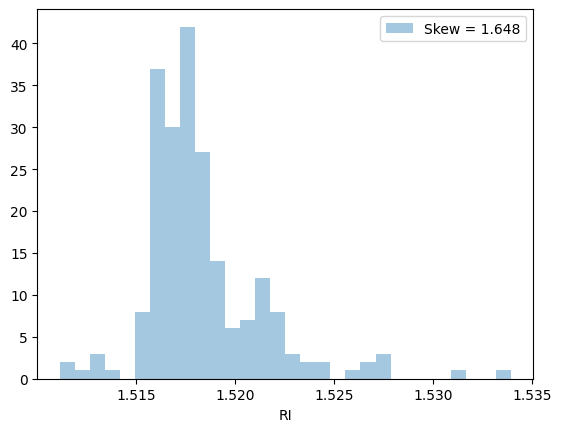

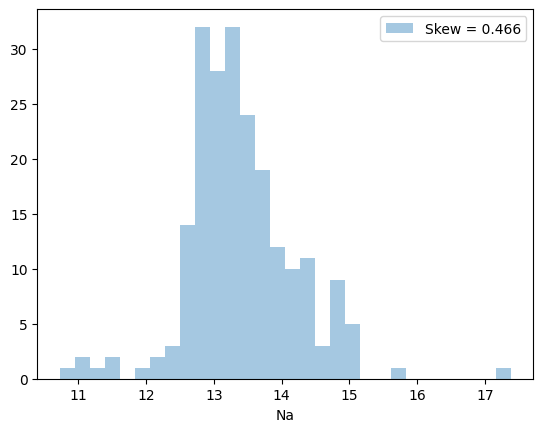

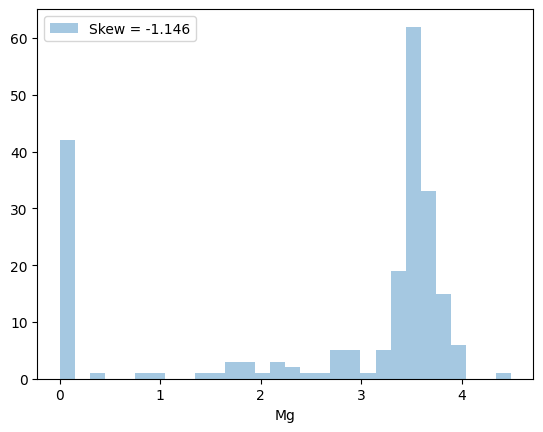

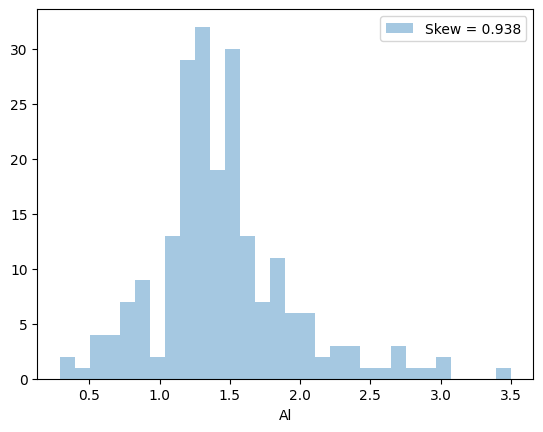

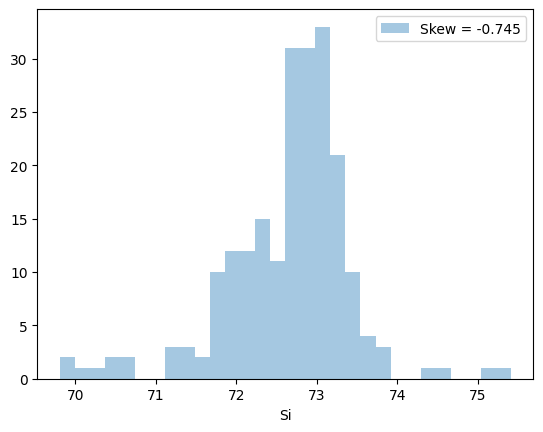

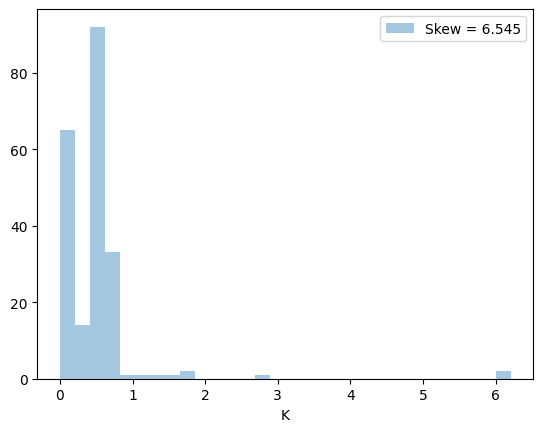

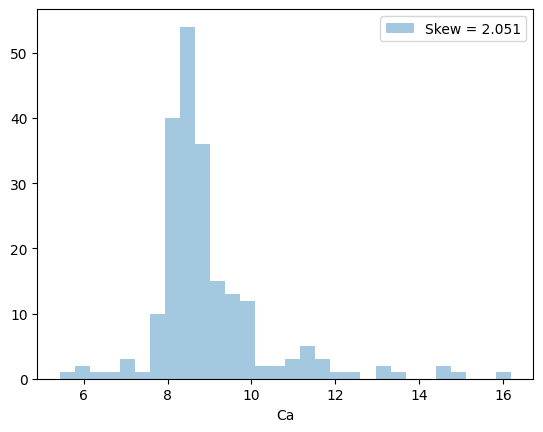

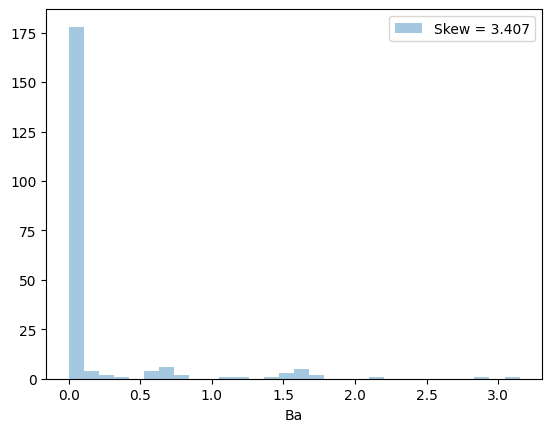

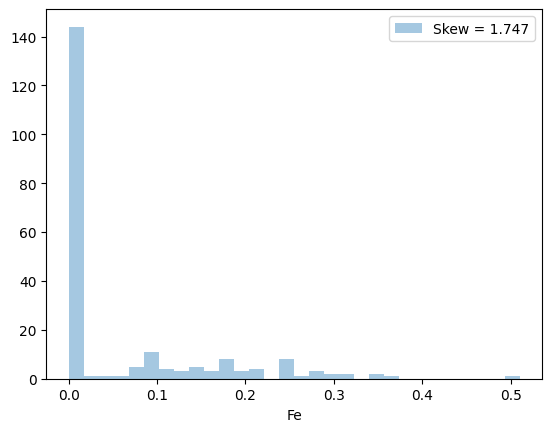

In [16]:
features = glass_df.columns[:-1].tolist()
for feat in features:
    skew = glass_df[feat].skew()
    sns.distplot(glass_df[feat], kde=False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

None of the features is normally distributed. The features Fe, Ba, Ca and K exhibit the highest skew coefficients. Moreover, the distribution of potassium (K) and Barium (Ba) seem to contain many outliers. Let's identify the indices of the observations containing outliers using Turkey's method.

In [19]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers.
    """
    outlier_indices = []

    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)

        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)

        # Interquartile rrange (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )

    return multiple_outliers

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(glass_df[features]))))

The dataset contains 14 observations with more than 2 outliers


##### Aha! there exists some 14 observations with multiple outliers. These could harm the efficiency of our learning algorithms. We'll make sure to get rid of these in the next sections.

Let's examine the boxplots for the several distributions

In [20]:
list(glass_df)

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

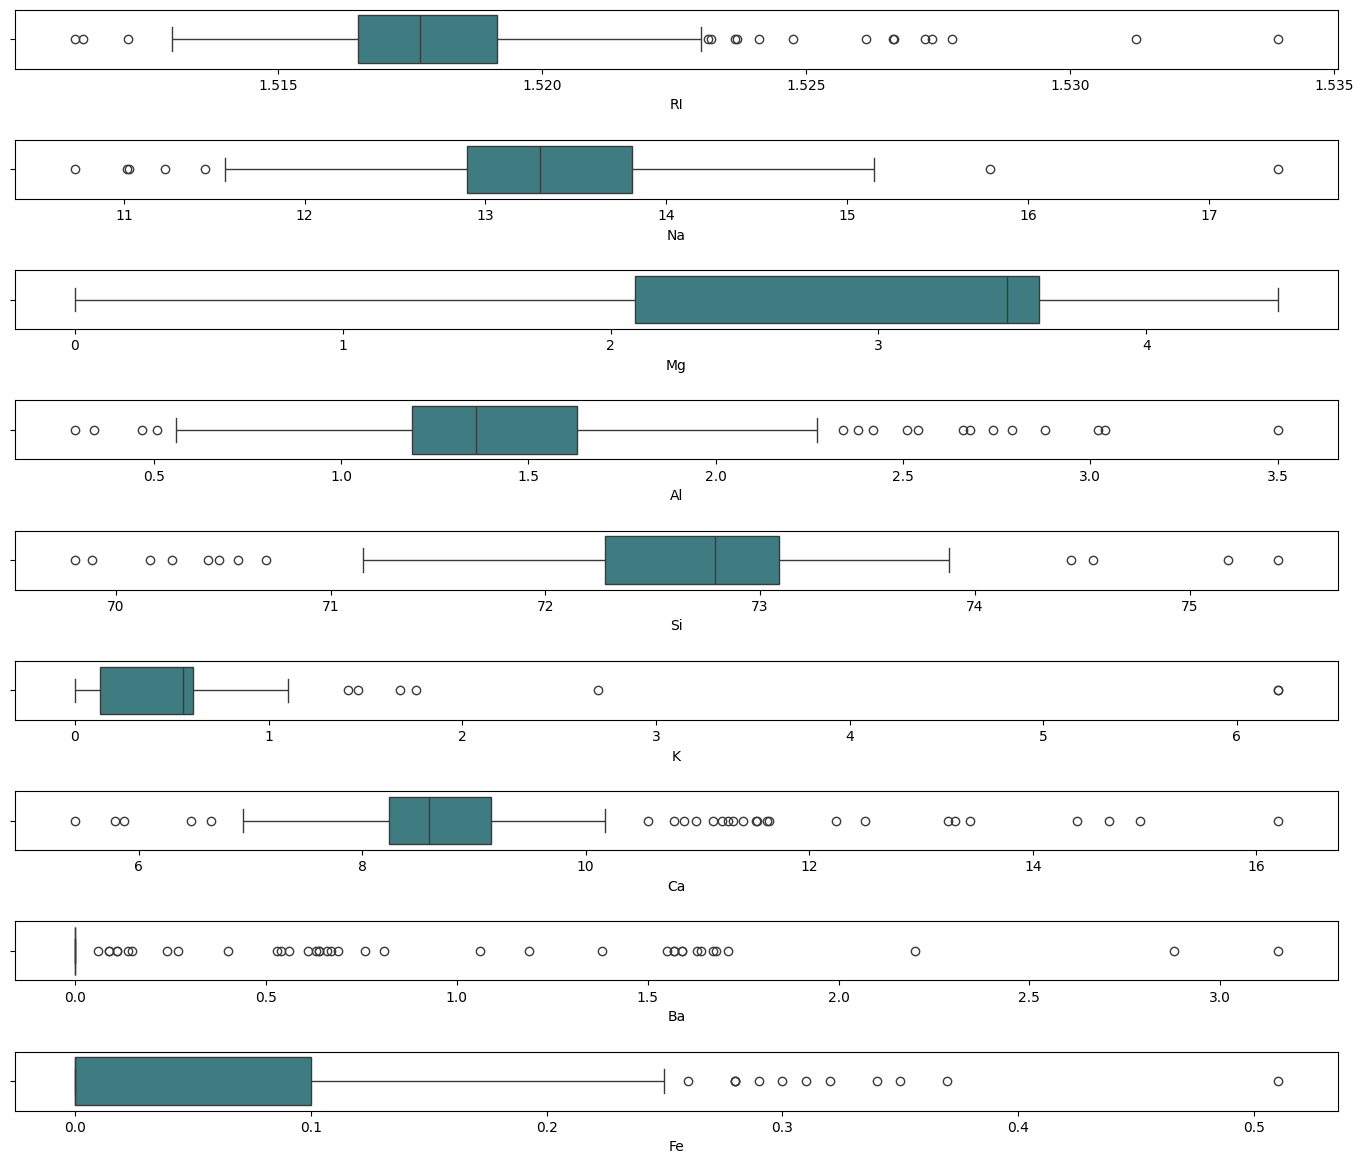

In [21]:
ot = glass_df.copy()
fig, axes = plt.subplots(9,1, figsize =(14,12), sharex=False, sharey=False)
sns.boxplot(x='RI', data=ot, palette='crest', ax= axes[0])
sns.boxplot(x='Na', data=ot, palette='crest', ax= axes[1])
sns.boxplot(x='Mg', data=ot, palette='crest', ax= axes[2])
sns.boxplot(x='Al', data=ot, palette='crest', ax= axes[3])
sns.boxplot(x='Si', data=ot, palette='crest', ax= axes[4])
sns.boxplot(x='K', data=ot, palette='crest', ax= axes[5])
sns.boxplot(x='Ca', data=ot, palette='crest', ax= axes[6])
sns.boxplot(x='Ba', data=ot, palette='crest', ax= axes[7])
sns.boxplot(x='Fe', data=ot, palette='crest', ax= axes[8])
plt.tight_layout(pad=2.0)

<Axes: >

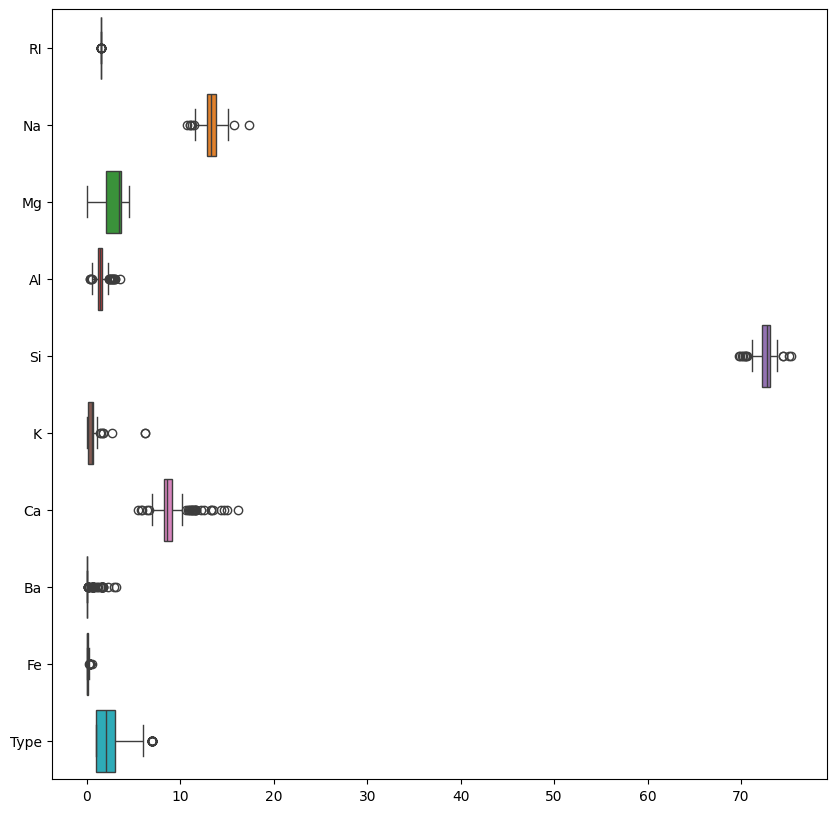

In [22]:
# outlier
plt.figure(figsize=(10,10))
sns.boxplot(data=glass_df, orient='h')

#### Unsurprisingly, Silicon has a mean that is much superior to the other constituents as we already saw in the previous section. Well, that is normal since glass is mainly based on silica.

In [23]:
plot(glass_df)

Output hidden; open in https://colab.research.google.com to view.

In [24]:
create_report(glass_df)

Output hidden; open in https://colab.research.google.com to view.

+ #### Multivariate Analysis<a class="anchor" id="4.2"></a>


Let's now proceed by drawing a pairplot to visually examine the correlation between the features.

<Figure size 800x800 with 0 Axes>

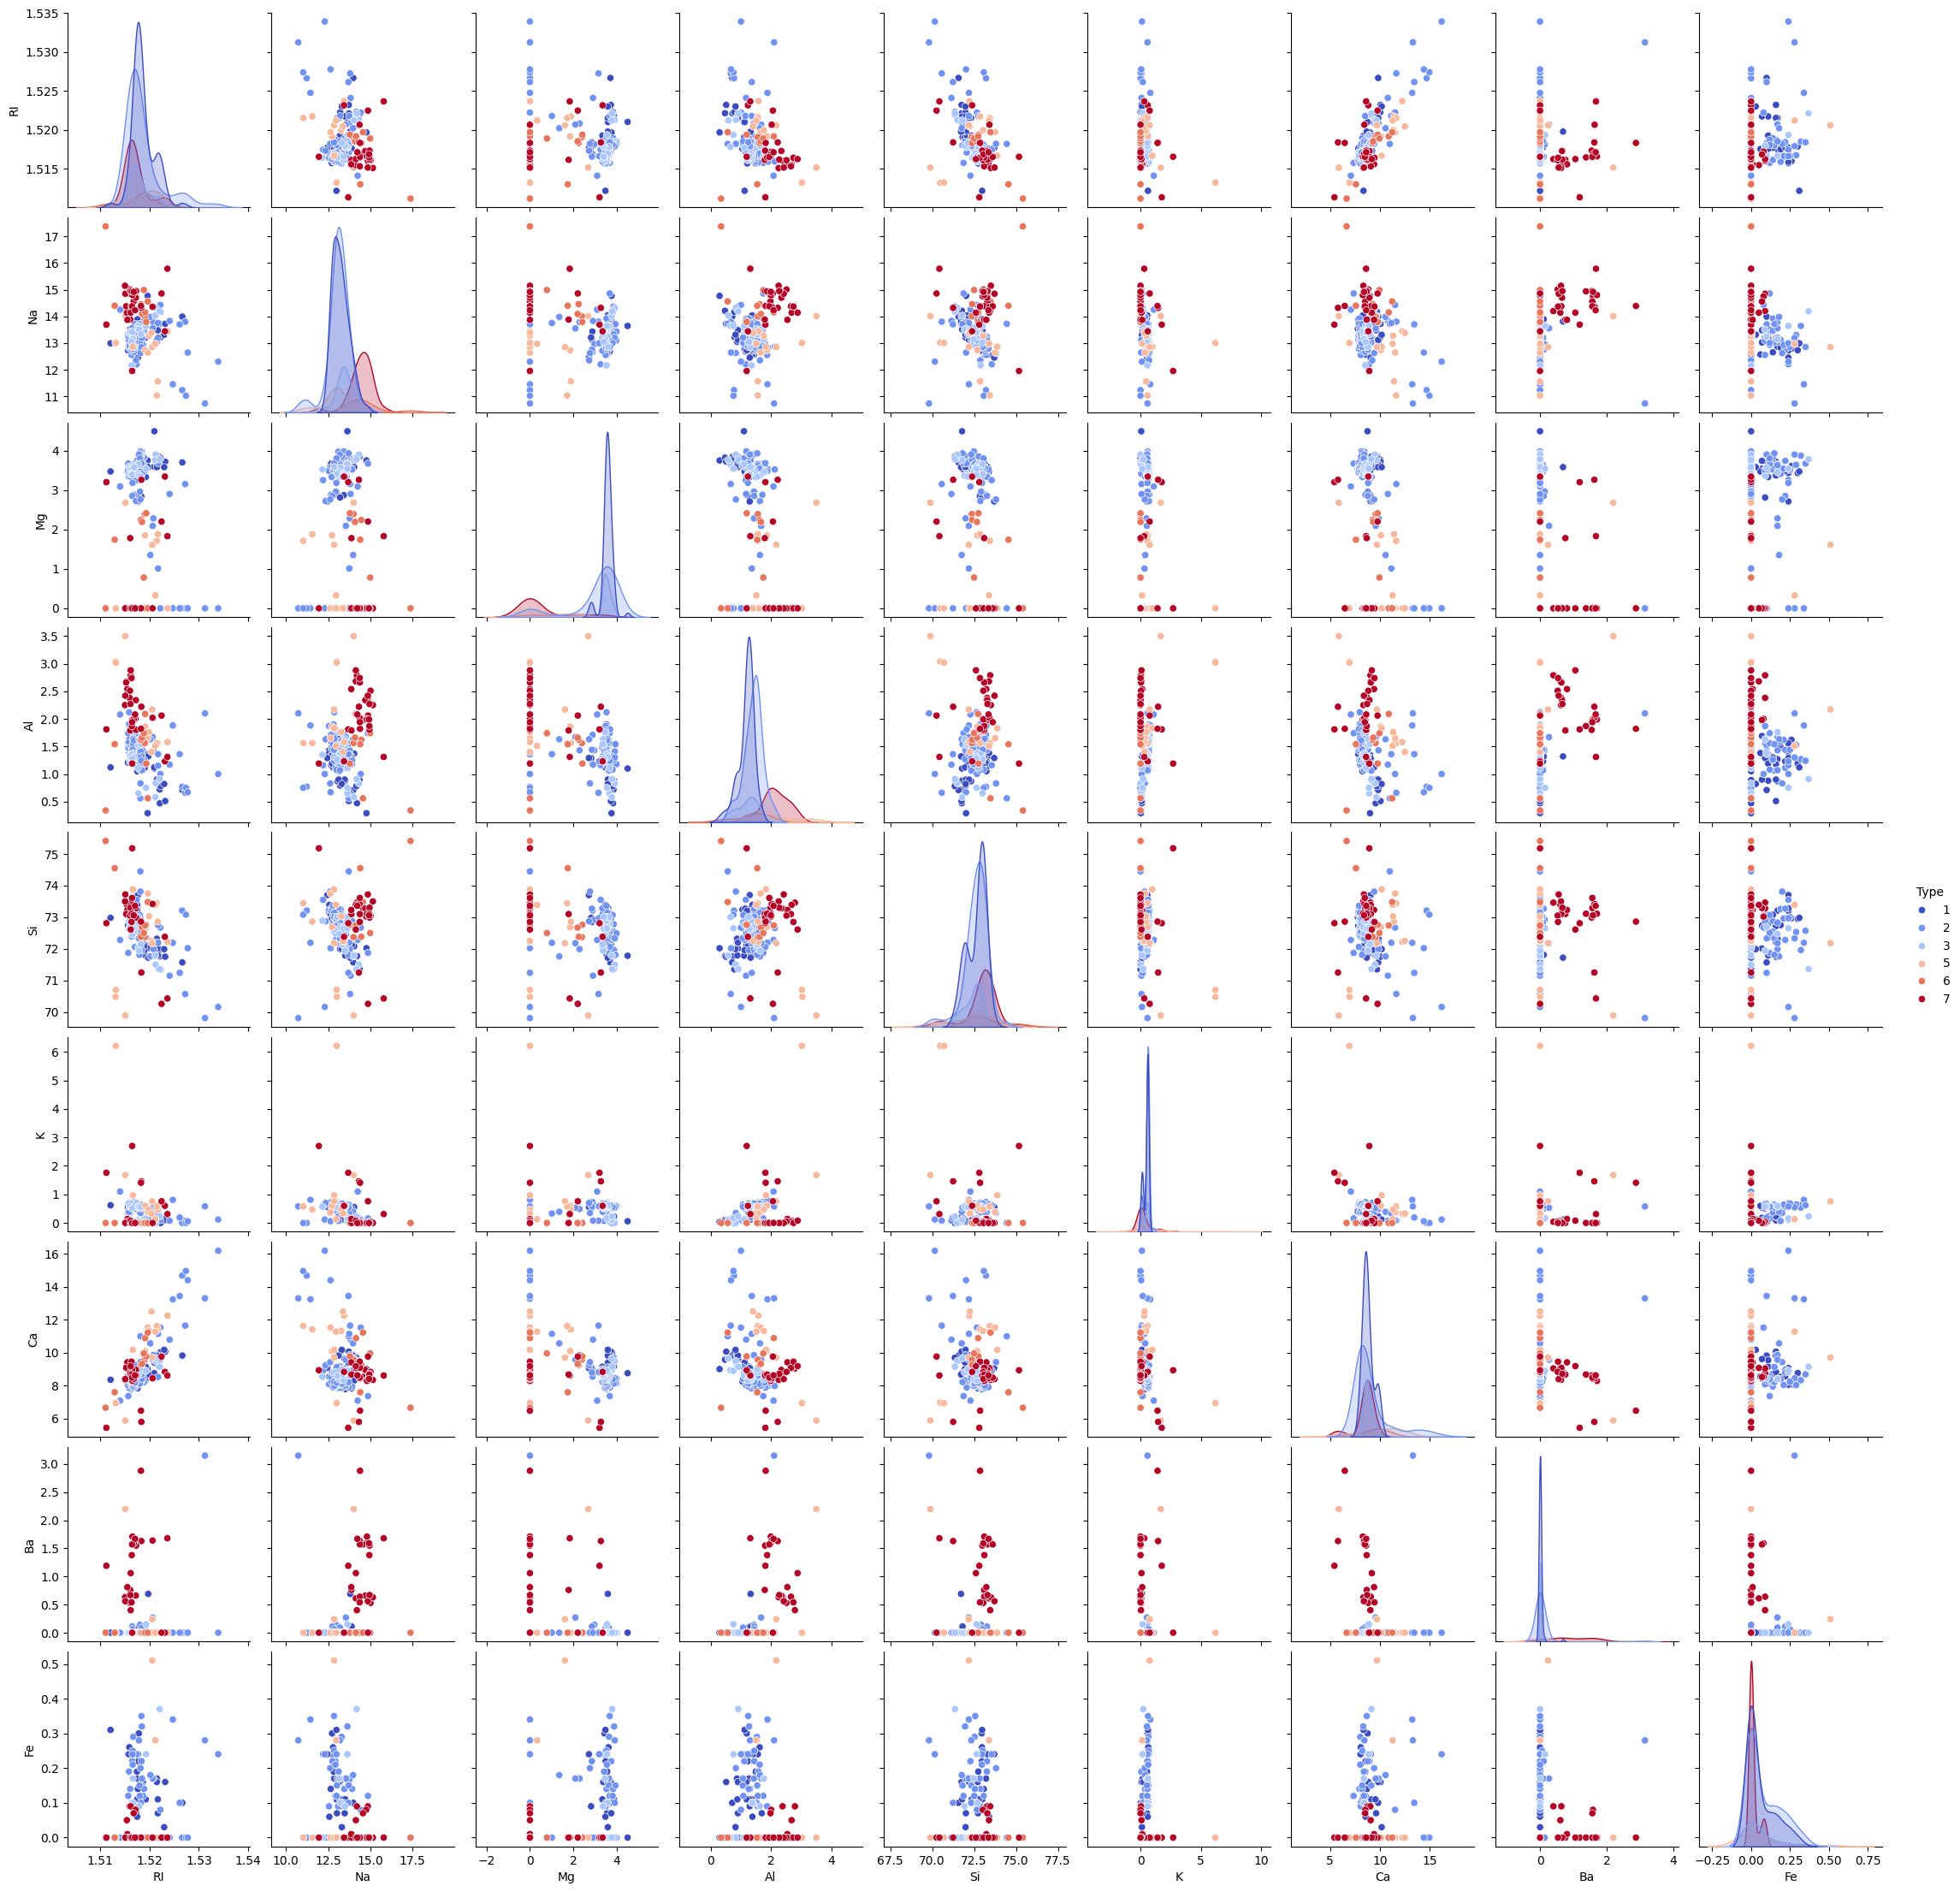

In [25]:
plt.figure(figsize=(8,8))
sns.pairplot(glass_df, hue ='Type', palette='coolwarm')
plt.show()

***Pearson's Correlation Coefficient***: helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

<Axes: >

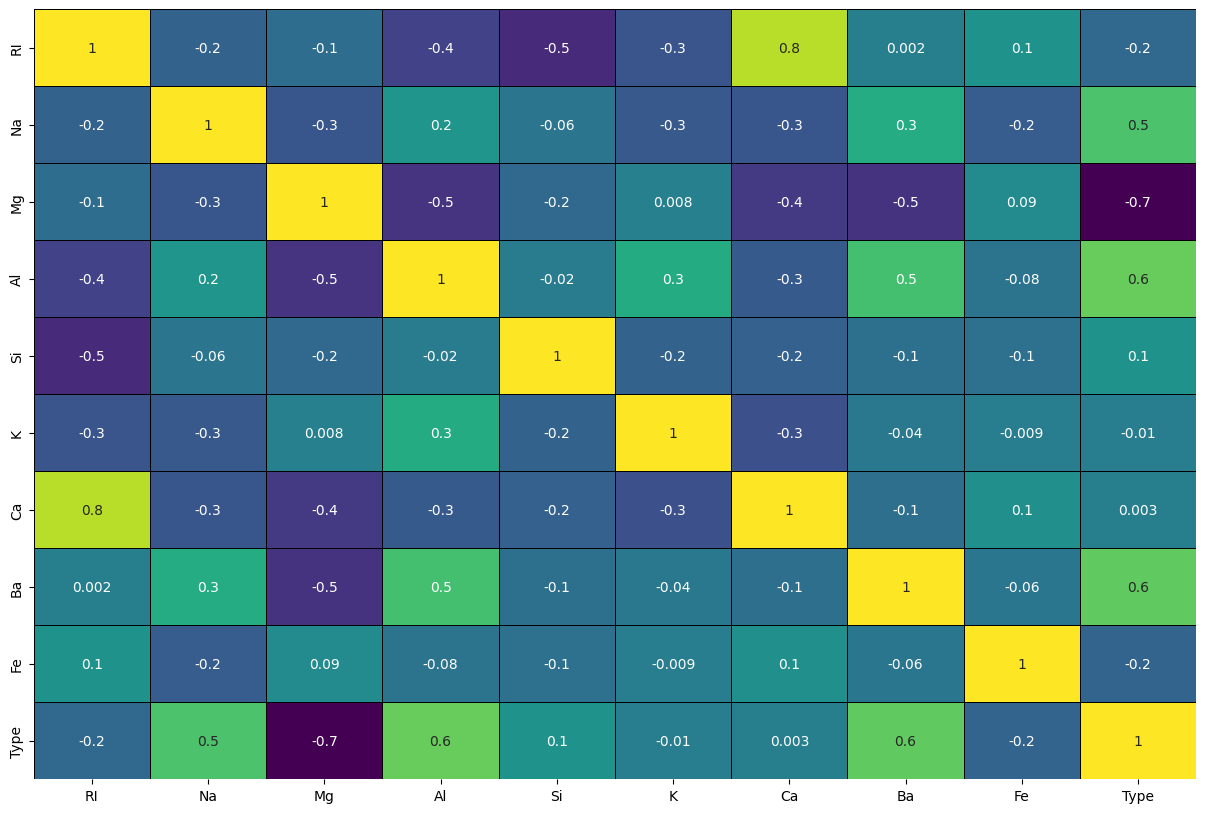

In [26]:
# Having a look at the correlation matrix

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(glass_df.corr(), annot=True, fmt='.1g', cmap='viridis', cbar=False, linewidths=0.5, linecolor='black')

Text(0.5, 1.0, 'Histogram of Classes')

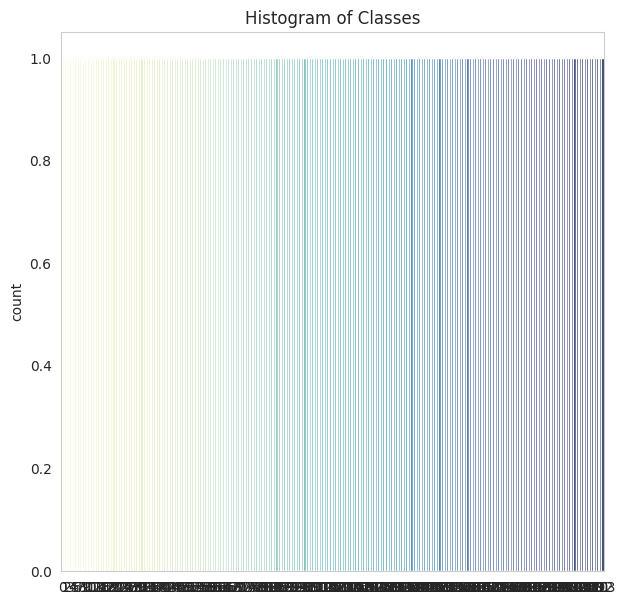

In [27]:
# Set default plot grid
sns.set_style('whitegrid')
# Plot histogram of classes
plt.rcParams['figure.figsize'] = (7,7)
sns.countplot(glass_df['Type'], palette='YlGnBu')
ax = plt.gca()
ax.set_title("Histogram of Classes")

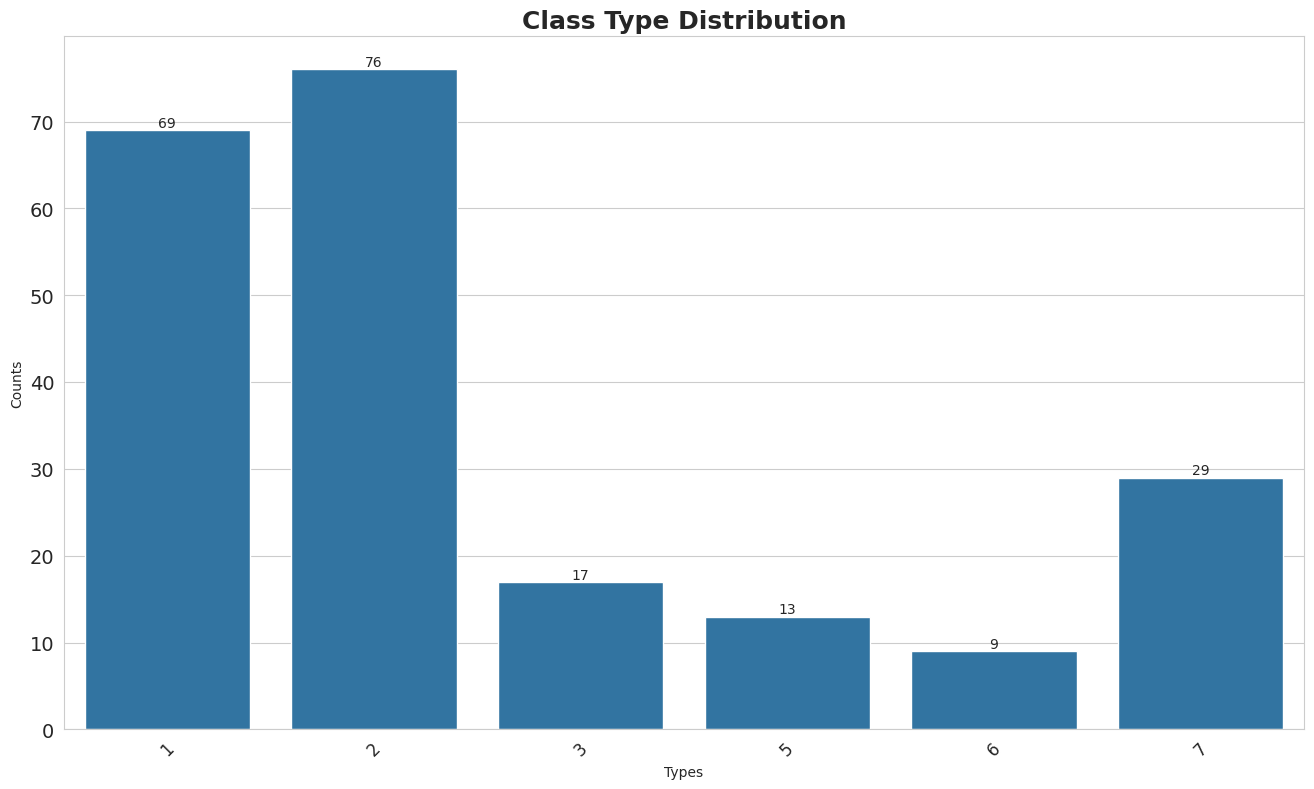

In [28]:
plt.figure(figsize = (16,9))
ax= sns.barplot(x = glass_df['Type'].value_counts().index.tolist(), y = glass_df['Type'].value_counts().tolist())
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title("Class Type Distribution", fontsize = 18, fontweight ='bold')
plt.xlabel("Types")
plt.ylabel("Counts")
for i in ax.containers:
  ax.bar_label(i,)

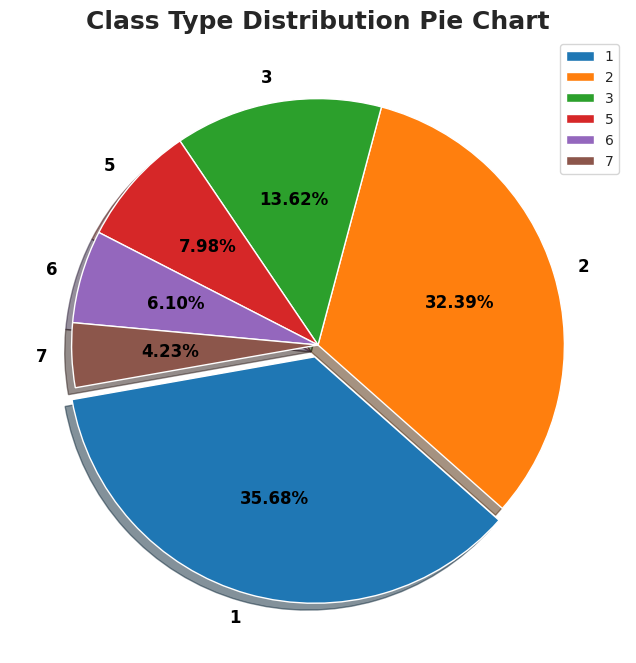

In [29]:
plt.figure(figsize=(12,8))
plt.pie(glass_df['Type'].value_counts(),
        labels=glass_df.Type.unique(),
        explode=[0.05, 0.0, 0.0, 0.0, 0.0, 0.0],
        autopct='%.2f%%',
        shadow=True,
        startangle = 190,
        textprops= {'size':'large',
                    'fontweight':'bold',
                    'rotation': 'horizontal',
                    'color':'black'})
plt.legend(loc='upper right')
plt.title("Class Type Distribution Pie Chart", fontsize=18, fontweight='bold')
plt.show()

## 5. Data Pre-Processing<a class="anchor" id="5"></a>

#### Outliers
Outliers are the points that differ significantly from the rest of the data points.

The outliers will impact the classification/prediction of the model. The appropriate class for the new data point, according to the following diagram, should be “Category B” in green.

The model, however, would be unable to have the appropriate classification due to the existence of outliers. As a result, removing outliers before using KNN is recommended.

![image.png](attachment:image.png)

- Hunting and removing multiple outliers
Let's remove the observations containing multiple outliers with the function we created in the previous section.

In [30]:
outlier_indices = outlier_hunt(glass_df[features])
df = glass_df.drop(outlier_indices).reset_index(drop=True)
print(df.shape)
df.head()

(199, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Removing observations with multiple outliers (more than 2) leaves us with 200 observations to learn from. Let's now see how our distributions look like.

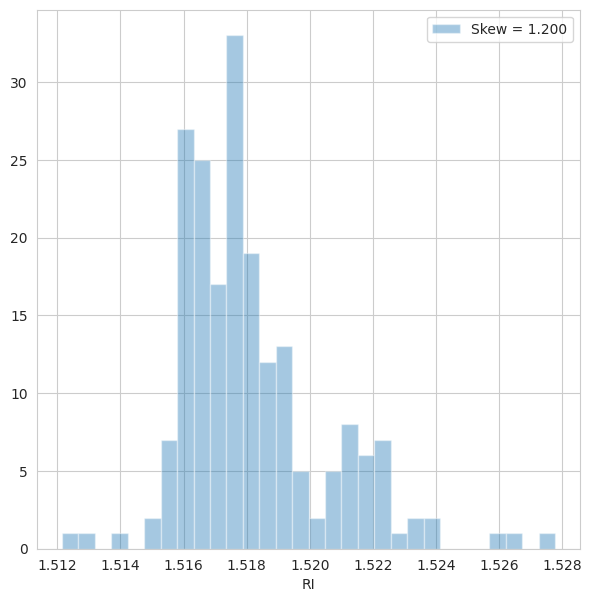

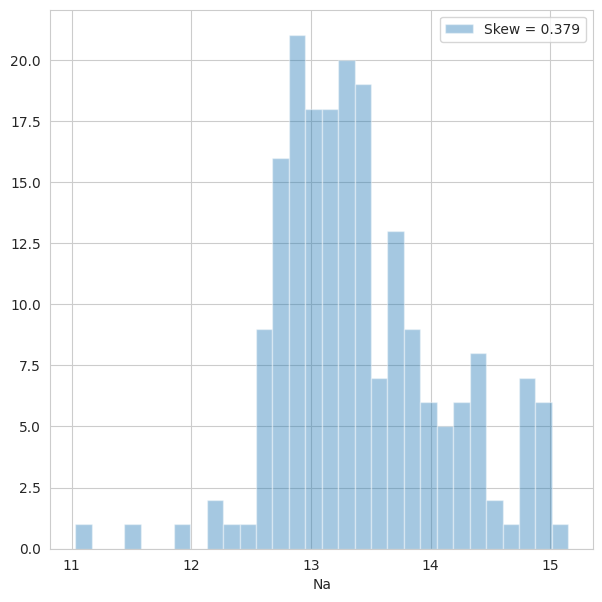

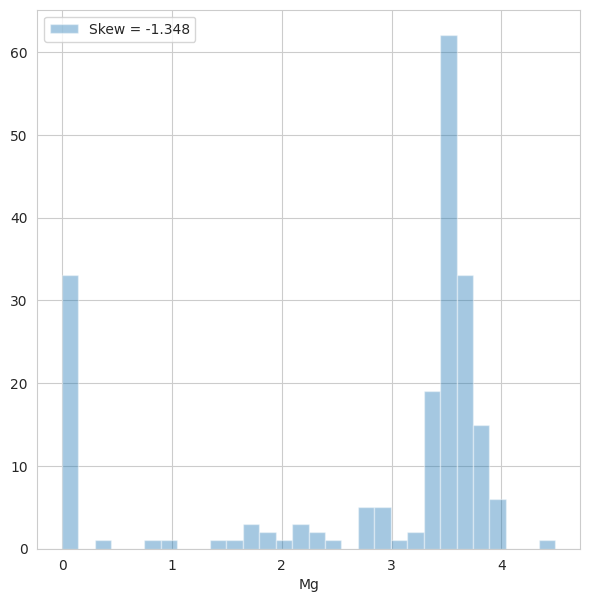

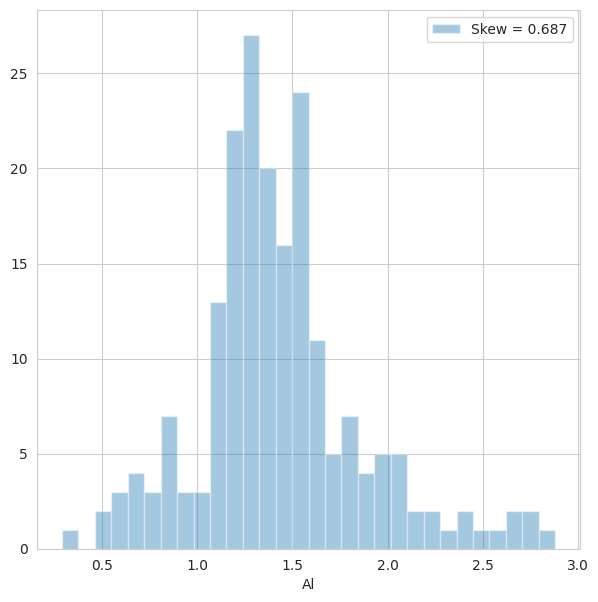

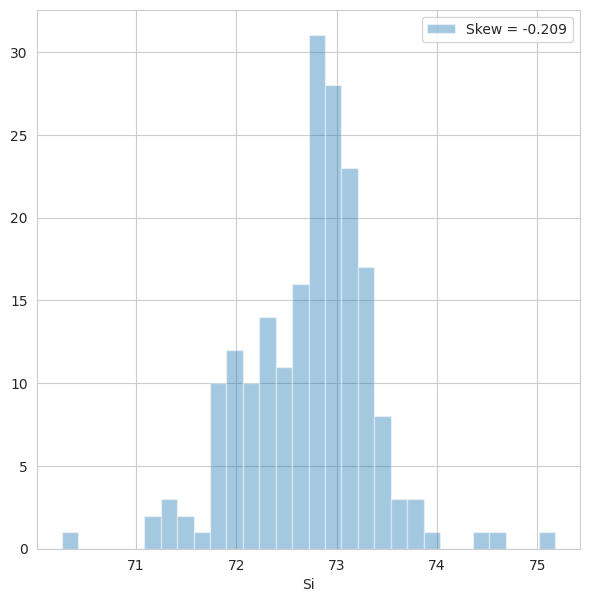

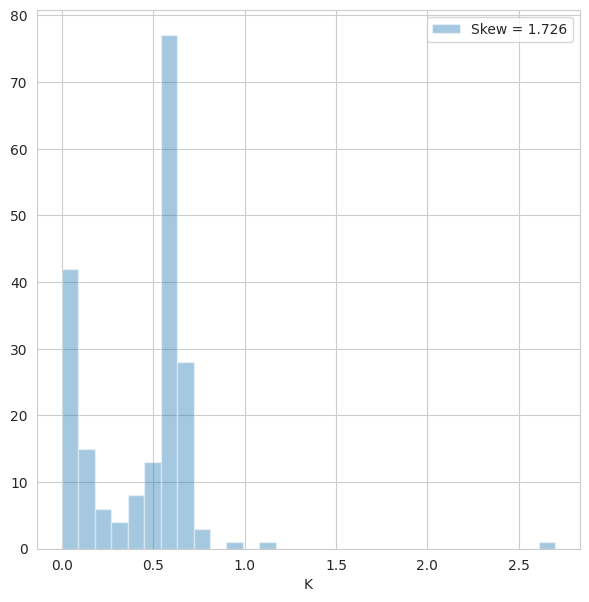

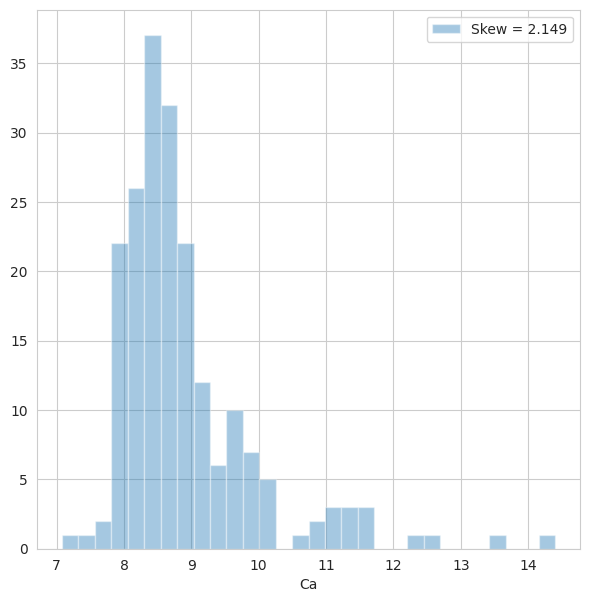

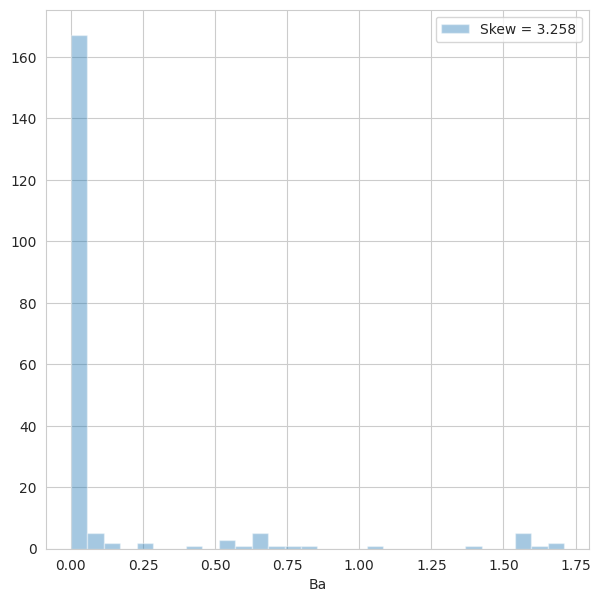

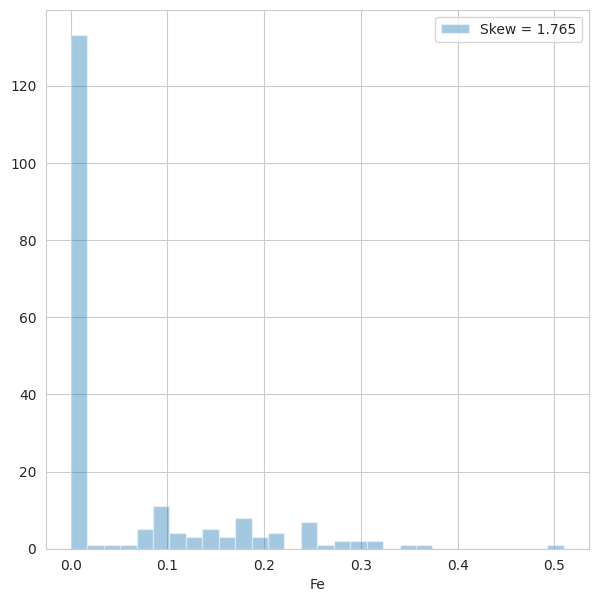

In [31]:
for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde=False, label ='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

## 5.1 Data transformation<a class="anchor" id="5.1"></a>
Let's examine if a Box-Cox transform can contribute to the normalization of some features. It should be emphasized that all transformations should only be done on the training set to avoid data snooping. Otherwise the test error estimation will be biased.

In [32]:
from scipy.stats import boxcox
features_boxcox = []

for feature in features:
    bc_transformed, _ = boxcox(df[feature] +1)
    features_boxcox.append(bc_transformed)

features_boxcox = np.column_stack(features_boxcox)
df_bc = pd.DataFrame(data=features_boxcox, columns=features)
df_bc['Type'] = df['Type']
df_bc.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,1.990000e+02,199.000000,199.000000,199.000000,1.990000e+02,199.000000,1.990000e+02,199.000000,199.000000,199.000000
mean,6.135862e-04,0.874501,14.578975,0.929450,1.023351e+10,0.344920,1.985160e-01,0.013508,0.019346,2.678392
std,1.086937e-19,0.002675,7.901546,0.202842,4.937335e+08,0.214132,7.909544e-07,0.031406,0.027959,2.056545
min,6.135862e-04,0.863427,0.000000,0.259213,8.401675e+09,0.000000,1.985128e-01,0.000000,0.000000,1.000000
25%,6.135862e-04,0.872688,9.896070,0.828312,9.937528e+09,0.127466,1.985155e-01,0.000000,0.000000,1.000000
50%,6.135862e-04,0.874194,18.254744,0.912136,1.030630e+10,0.448448,1.985159e-01,0.000000,0.000000,2.000000
75%,6.135862e-04,0.876051,19.566760,1.028606,1.052556e+10,0.481740,1.985164e-01,0.000000,0.051872,3.000000
max,6.135862e-04,0.880655,30.922362,1.492357,1.234753e+10,1.402012,1.985179e-01,0.091630,0.069336,7.000000


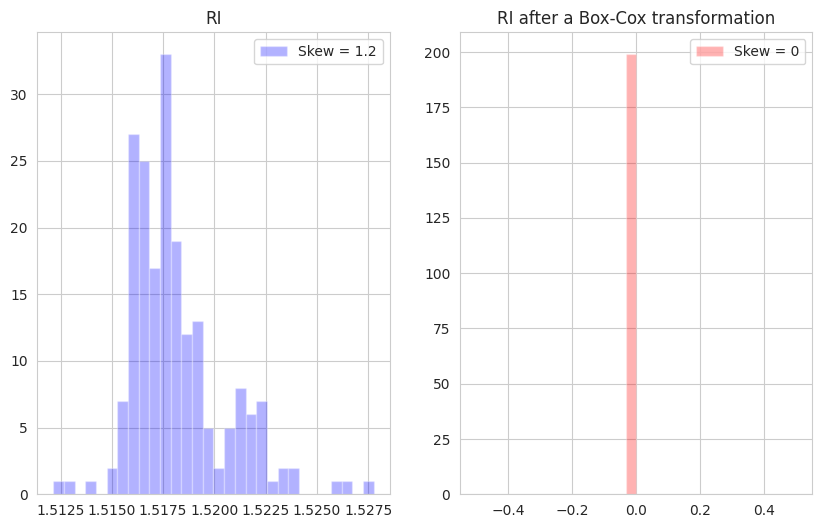

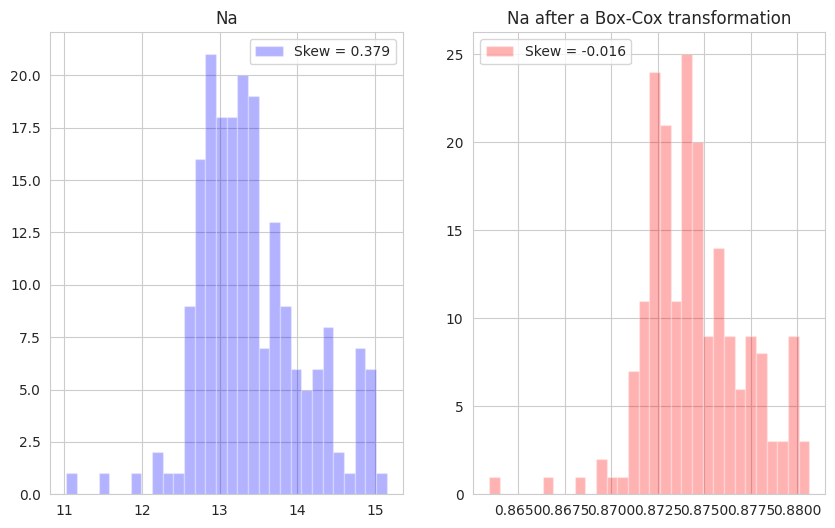

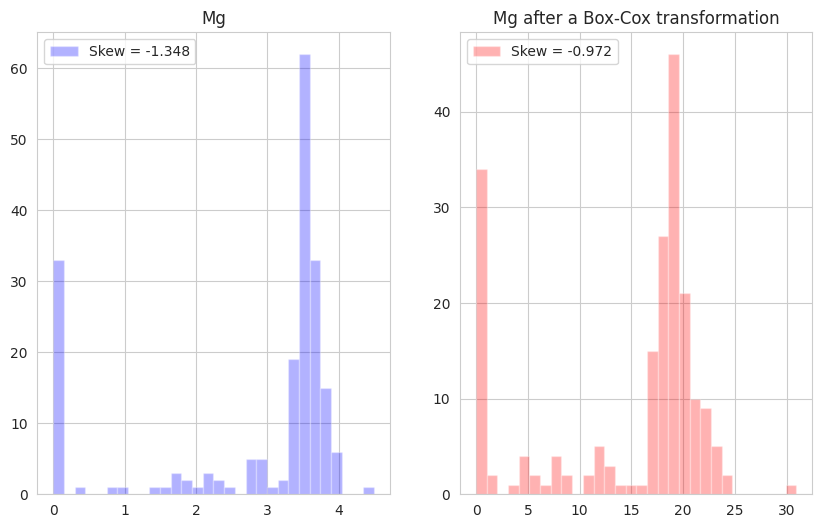

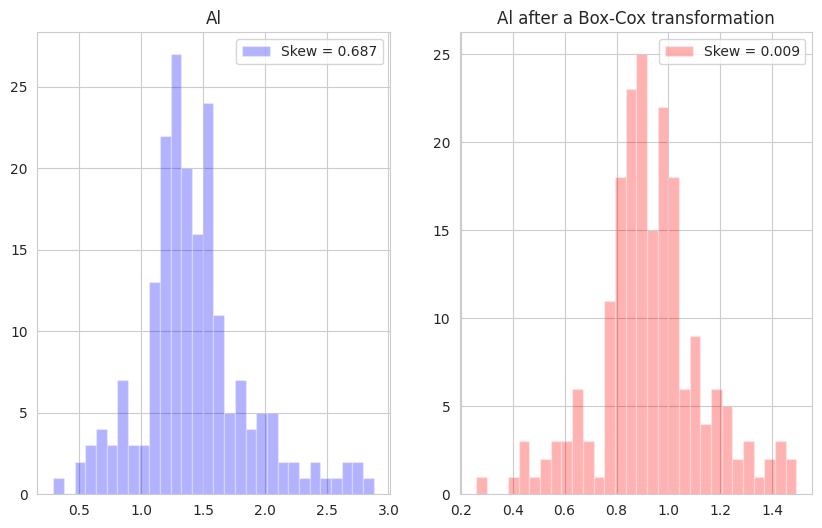

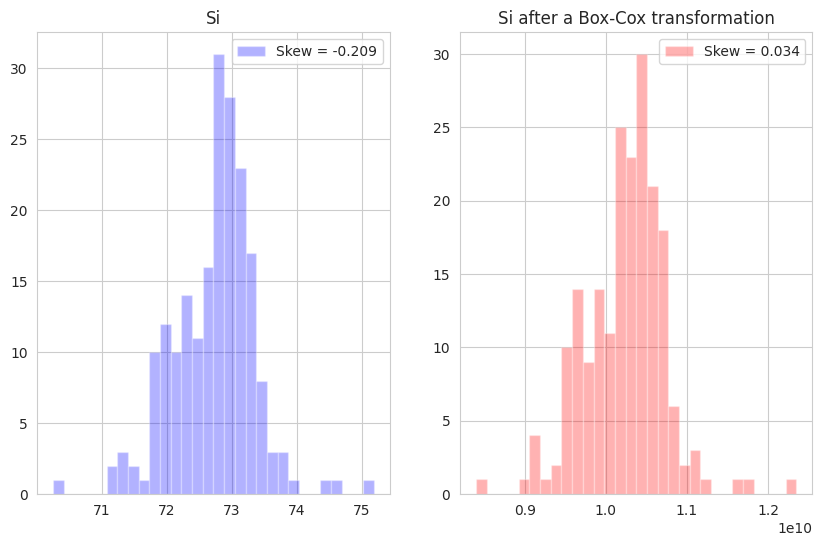

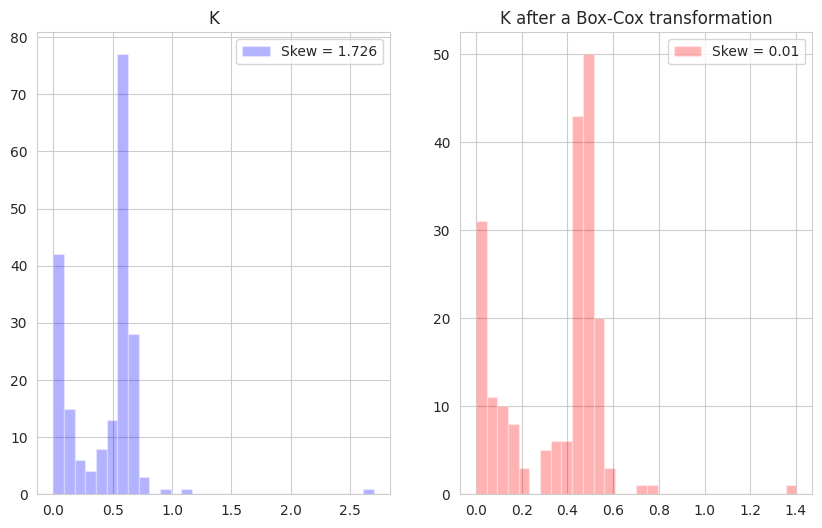

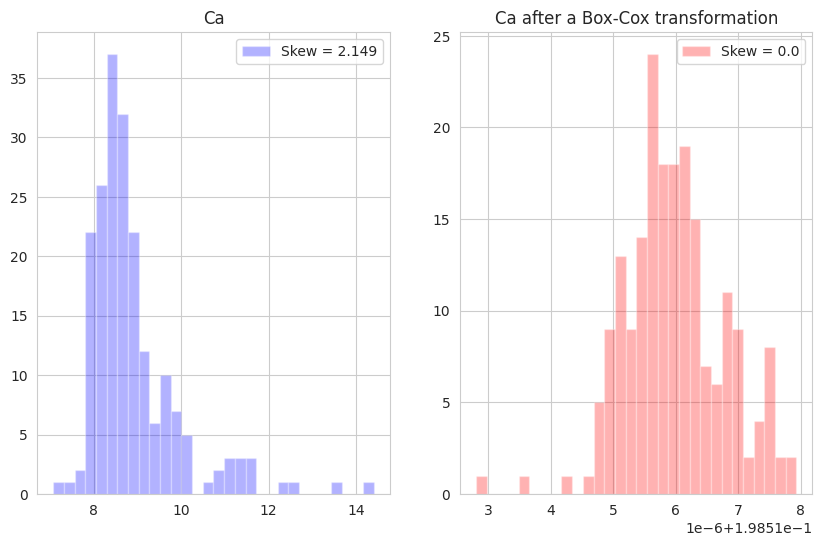

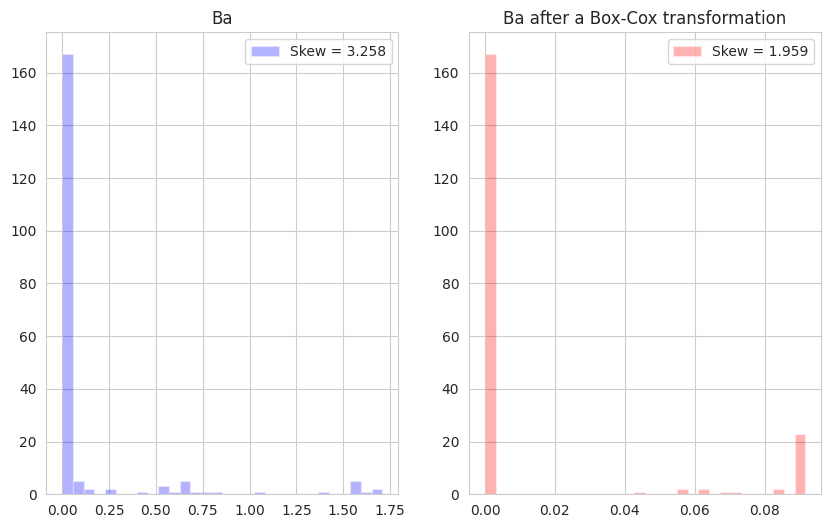

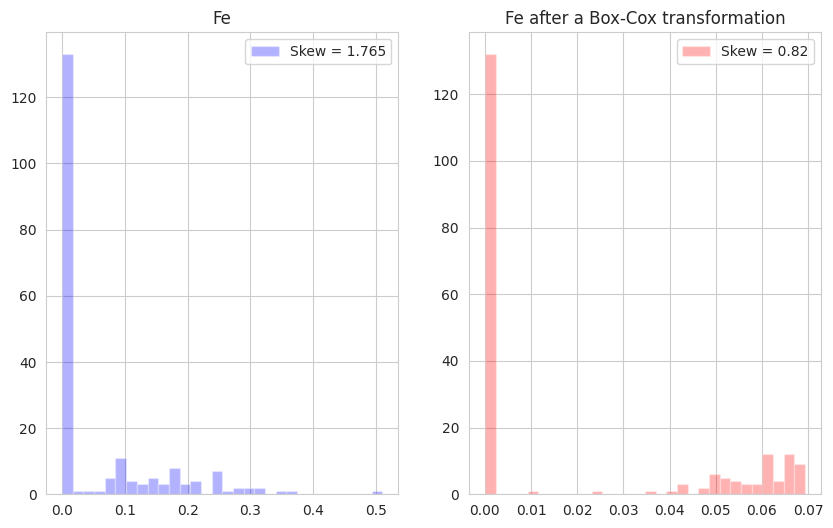

In [33]:
for feature in features:
    fig, ax = plt.subplots(1,2, figsize =(10,6))
    ax[0].hist(df[feature], color='blue', bins= 30, alpha=0.3, label='Skew = %s' %(str(round(df[feature].skew(),3))) )
    ax[0].set_title(str(feature))
    ax[0].legend(loc=0)
    ax[1].hist(df_bc[feature], color='red', bins=30, alpha=0.3, label='Skew = %s' %(str(round(df_bc[feature].skew(),3))) )
    ax[1].set_title(str(feature)+' after a Box-Cox transformation')
    ax[1].legend(loc=0)
    plt.show()

In [34]:
# Check if skew is closer to zero after a box-cox transform
for feature in features:
    delta = np.abs(df_bc[feature].skew() / df[feature].skew())
    if delta < 1.0:
      print("Feature %s is less skewed after a Box-Cox transform" %(feature))
    else:
      print("Feature %s is more skewed after a Box-Cox transform" %(feature))

Feature RI is less skewed after a Box-Cox transform
Feature Na is less skewed after a Box-Cox transform
Feature Mg is less skewed after a Box-Cox transform
Feature Al is less skewed after a Box-Cox transform
Feature Si is less skewed after a Box-Cox transform
Feature K is less skewed after a Box-Cox transform
Feature Ca is less skewed after a Box-Cox transform
Feature Ba is less skewed after a Box-Cox transform
Feature Fe is less skewed after a Box-Cox transform


## 5.2 Dimensionality reduction<a class="anchor" id="5.2"></a>
+ **`PCA`**
Let's go ahead and perform a PCA on the features to decorrelate the ones that are linearly dependent and then let's plot the cumulative explained variance.

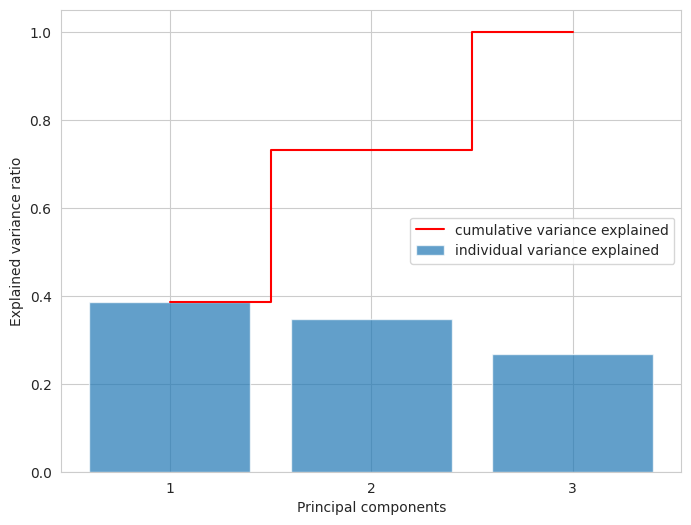

In [35]:
import numpy as np
from sklearn.decomposition import PCA

# Create a sample dataset
data = np.random.rand(100, 3)

# Create a PCA object
pca = PCA(random_state=0)

# Fit the PCA object to the data
pca.fit(data)

# Get the explained variance ratio
var_exp = pca.explained_variance_ratio_

# Get the cumulative explained variance ratio
cum_var_exp = np.cumsum(var_exp)

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(
    range(1, len(cum_var_exp) + 1),
    var_exp,
    align="center",
    label="individual variance explained",
    alpha=0.7,
)
plt.step(
    range(1, len(cum_var_exp) + 1),
    cum_var_exp,
    where="mid",
    label="cumulative variance explained",
    color="red",
)
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal components")
plt.xticks(np.arange(1, len(var_exp) + 1, 1))
plt.legend(loc="center right")
plt.show()

In [36]:
# Cumulative variance explained
for i, sum in enumerate(cum_var_exp):
    print("PC"+ str(i+1), "Cumulative variance: {:.2f}%".format(cum_var_exp[i]*100))

PC1 Cumulative variance: 38.59%
PC2 Cumulative variance: 73.21%
PC3 Cumulative variance: 100.00%


## 5.3 Test Train Split and Cross Validation methods<a class="anchor" id="5.3"></a>



***Train Test Split*** : To have unknown datapoints to test the data rather than testing with the same points with which the model was trained. This helps capture the model performance much better.

![](https://cdn-images-1.medium.com/max/1600/1*-8_kogvwmL1H6ooN1A1tsQ.png)

***Cross Validation***: When model is split into training and testing it can be possible that specific type of data point may go entirely into either training or testing portion. This would lead the model to perform poorly. Hence over-fitting and underfitting problems can be well avoided with cross validation techniques

![](https://cdn-images-1.medium.com/max/1600/1*4G__SV580CxFj78o9yUXuQ.png)


***About Stratify*** : Stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

For Reference : https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

In [37]:
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [38]:
x = glass_df.drop('Type', axis=1)
y = glass_df[['Type']]

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [40]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (149, 9)
Shape of X_test:  (64, 9)
Shape of y_train:  (149, 1)
Shape of y_test (64, 1)


### 5.4 Standardize the Variables <a class="anchor" id="5.4"></a>
Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

#### Importance of scaling down the numeric variables to the same level
+ Data has 2 parts: –
+ 1) Magnitude
+ 2) Unit\
For instance; if we say 20 years then “20” is the magnitude here and “years” is its unit.
Since it is a distance-dependent algorithm, KNN selects the neighbours in the closest vicinity based solely on the magnitude of the data.  Have a look at the diagram below; the data is not scaled, so it can not find the closest neighbours correctly.  As a consequence, the outcome will be influenced.

![image.png](attachment:image.png)

The data values in the previous figure have now been scaled down to the same level in the following example. Based on the scaled distance, all of the closest neighbours would be accurately identified.

![image-2.png](attachment:image-2.png)

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train =sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## 6. How to choose the value for K?<a class="anchor" id="6"></a>
K is a crucial parameter in the KNN algorithm. Some suggestions for choosing K Value are:

1. Using error curves: The figure below shows error curves for different values of K for training and test data.

![image.png](attachment:image.png)

### 6.1 Grid search for choosing the best Value of K<a class="anchor" id="6.1"></a>

In [42]:
# Get score for different values of n
k_list = np.arange(1, 40, 2)
mean_score = []
accuracy_list =[]
error_rate = []

for i in k_list:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    pred_i = pred_i.reshape(len(x_test),1)
    score = cross_val_score(knn, x_train, y_train, cv=10)
    mean_score.append(np.mean(score))
    error_rate.append(np.mean(pred_i != y_test))

In [43]:
n_neighbors = np.array([2*i+1 for i in range(1,20)])
param_grid = dict(n_neighbors = n_neighbors)
n_neighbors

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])

In [44]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv=10)
grid.fit(x,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])})

In [45]:
print(grid.best_score_)
print(grid.best_params_)

0.6339826839826839
{'n_neighbors': 3}


It is recommended to always select an odd value of K ~
When the value of K is set to even, a situation may arise in which the elements from both groups are equal. In the diagram below, elements from both groups are equal in the internal “Red” circle (k == 4).

In this condition, the model would be unable to do the correct classification for you. Here the model will randomly assign any of the two classes to this new unknown data.

Choosing an odd value for K is preferred because such a state of equality between the two classes would never occur here. Due to the fact that one of the two groups would still be in the majority, the value of K is selected as odd.

![image.png](attachment:image.png)

### 6.2 Visualizing the CV results<a class="anchor" id="6.2"></a>

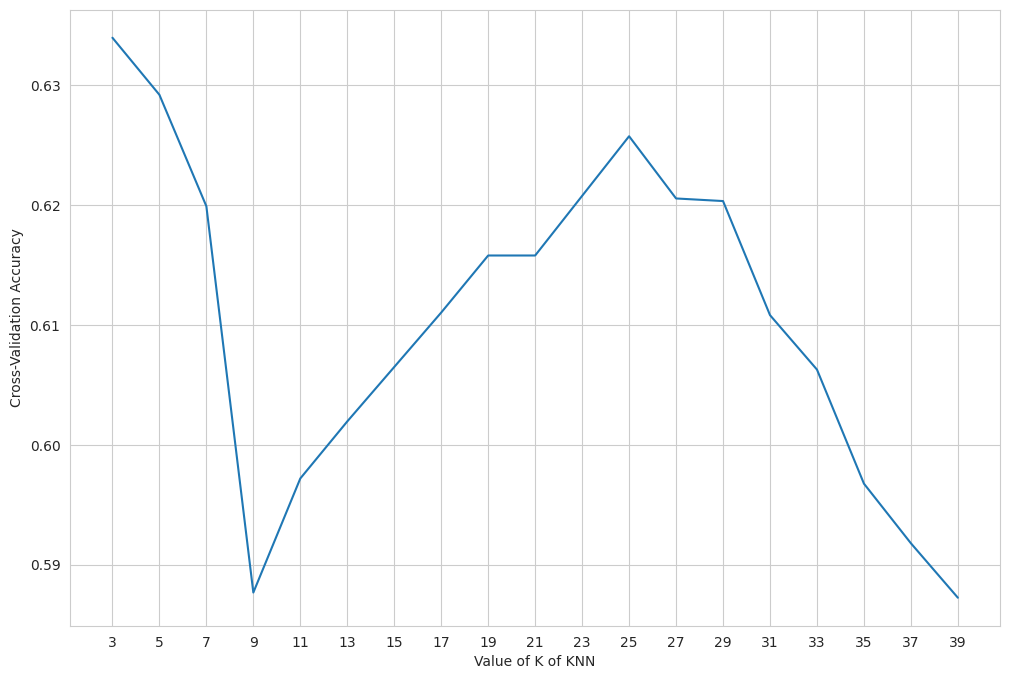

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
k_range = np.array([2*i+1 for i in range(1,20)])
k_scores =[]
# use iteration to calculator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x,y,cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.figure(figsize=(12,8))
plt.plot(k_range, k_scores)
plt.xlabel("Value of K of KNN")
plt.ylabel("Cross-Validation Accuracy")
plt.xticks(k_range)
plt.show()

# We can take K=3

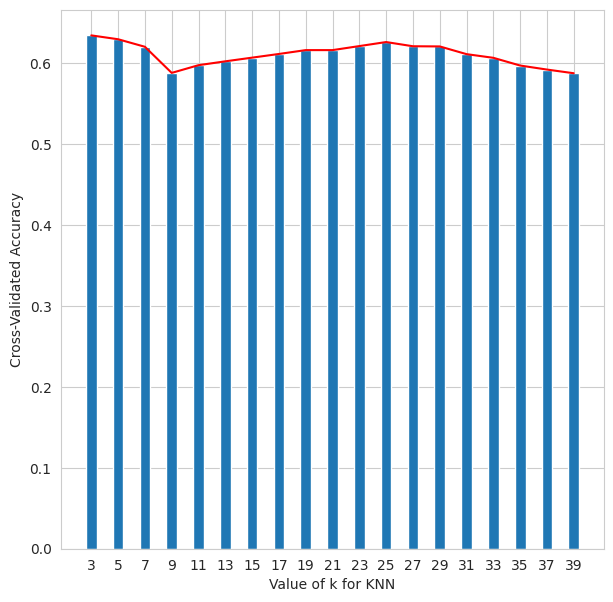

<Figure size 1200x800 with 0 Axes>

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
# Choose k betwen 1 to 20
k_range = [2*i+1 for i in range(1,20)]
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x,y, cv=10)
    k_scores.append(scores.mean())

# plot to see clearly
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores, color = 'red')
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.figure(figsize=(12,8))
plt.show()

Text(0, 0.5, 'Error Rate')

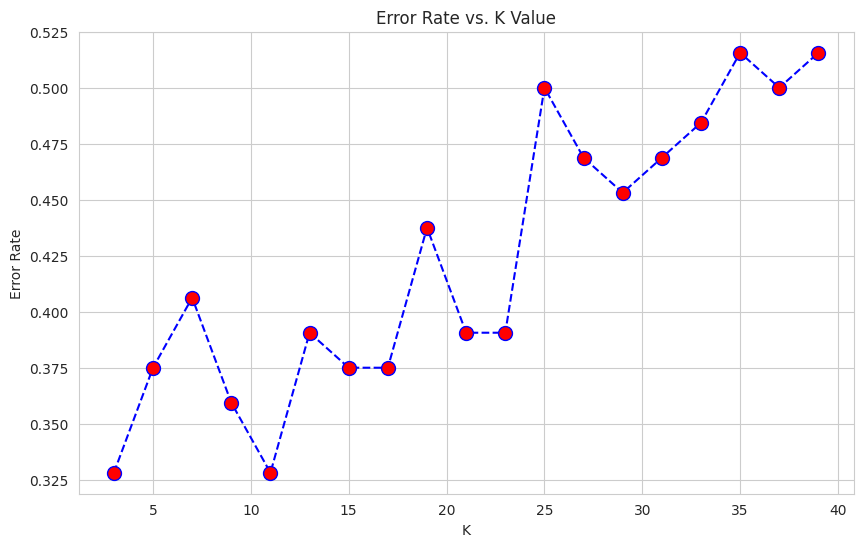

In [53]:
error_rate = []
# Will take some time
k_range = [i for i in range(3,40,2)]
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    pred_i = pred_i.reshape(-1, 1)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot([i for i in range(3, 40, 2)],error_rate, color ='blue', linestyle = 'dashed', marker='o',
                 markerfacecolor ='red', markersize = 10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

Here we can see that that after K>3 the error rate just tends to hover around 0-0.5 Let's retrain the model with that and check the classification report!

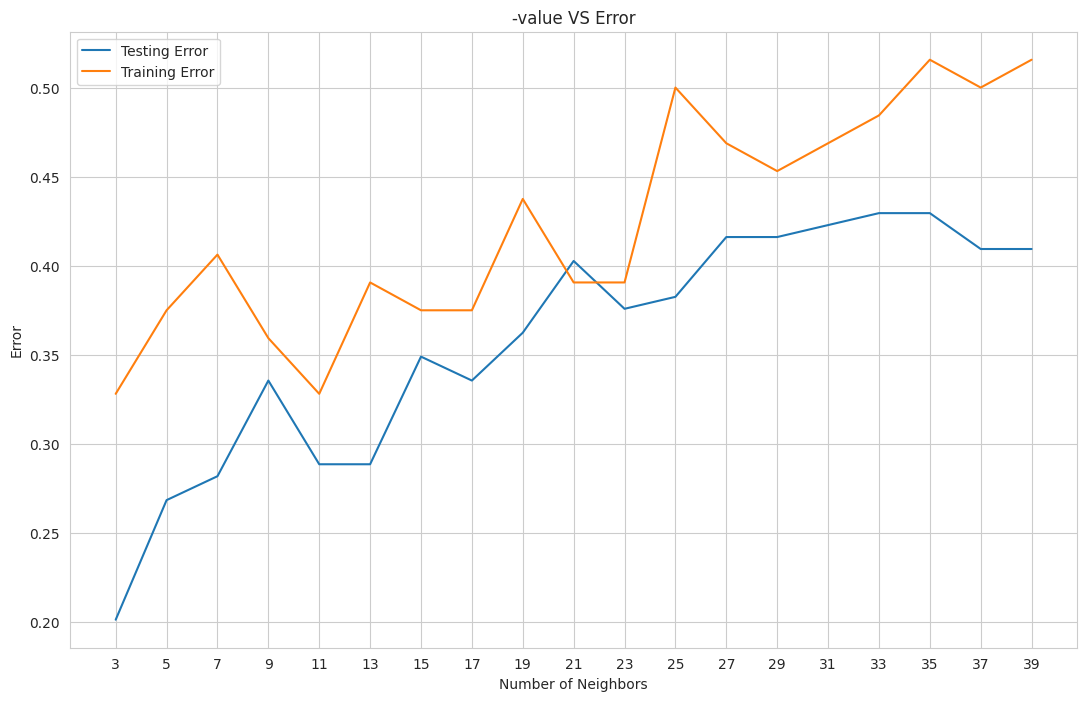

In [56]:
error1 = []
error2 = []
k_range == [i for i in range(3,40, 2)]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred1 = knn.predict(x_train)
    y_pred1 = y_pred1.reshape(-1,1)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2 = knn.predict(x_test)
    y_pred2 = y_pred2.reshape(-1,1)
    error2.append(np.mean(y_test!= y_pred2))
#Plot
plt.figure(figsize=[13,8])
plt.plot(k_range, error1, label = 'Testing Error')
plt.plot(k_range, error2, label = 'Training Error')
plt.legend()
plt.title('-value VS Error')
plt.xlabel("Number of Neighbors")
plt.ylabel("Error")
plt.xticks(k_range)
plt.show()

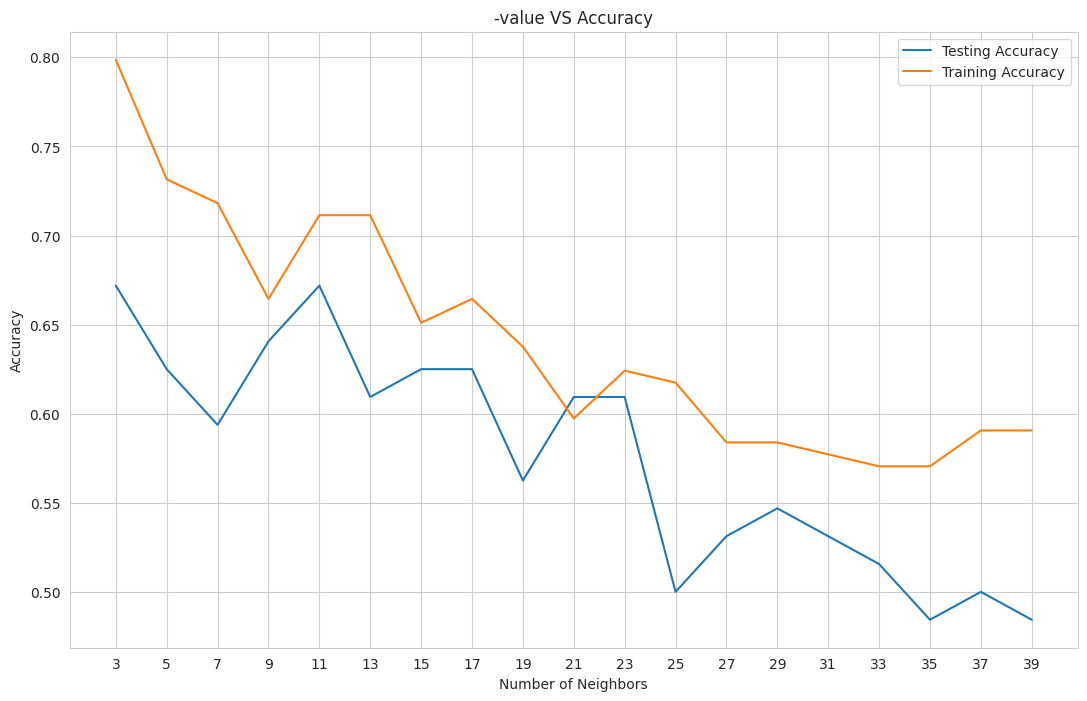

In [57]:
train_accuracy = []
test_accuracy = []

k_range = [i for i in range(3,40, 2)]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train, y_train)
    # train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(k_range, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_range, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.xticks(k_range)
plt.show()

The impact of selecting a smaller or larger K value on the model

+ Larger K value: The case of underfitting occurs when the value of k is increased. In this case, the model would be unable to correctly learn on the training data.

+ Smaller k value: The condition of overfitting occurs when the value of k is smaller. The model will capture all of the training data, including noise. The model will perform poorly for the test data in this scenario.

![image.png](attachment:image.png)

##### The best value of K is 3 lets check for this value in classification Report

### 7. Applying KNN<a class="anchor" id="7"></a>

#### How does KNN Work?
1. Principle:
Consider the following figure. Let us say we have plotted data points from our training set on a two-dimensional feature space. As shown, we have a total of 6 data points (3 red and 3 blue). Red data points belong to ‘class1’ and blue data points belong to ‘class2’. And yellow data point in a feature space represents the new point for which a class is to be predicted. Obviously, we say it belongs to ‘class1’ (red points)

Why?

Because its nearest neighbors belong to that class!

![image.png](attachment:image.png)

Yes, this is the principle behind K Nearest Neighbors. Here, nearest neighbors are those data points that have minimum distance in feature space from our new data point. And K is the number of such data points we consider in our implementation of the algorithm. Therefore, distance metric and K value are two important considerations while using the KNN algorithm. Euclidean distance is the most popular distance metric. You can also use Hamming distance, Manhattan distance, Minkowski distance as per your need. For predicting class/ continuous value for a new data point, it considers all the data points in the training dataset. Finds new data point’s ‘K’ Nearest Neighbors (Data points) from feature space and their class labels or continuous values.

### 7.1 Predictions and Evaluations<a class="anchor" id="7.1"></a>
Let's evaluate our KNN model!

#### 1. Confusion Matrix

The confusion matrix is a technique used for summarizing the performance of a classification algorithm i.e. it has binary outputs.
![](https://cdn-images-1.medium.com/max/1600/0*-GAP6jhtJvt7Bqiv.png)



#### ***In the famous cancer example***:


###### Cases in which the doctor predicted YES (they have the disease), and they do have the disease will be termed as TRUE POSITIVES (TP). The doctor has correctly predicted that the patient has the disease.

###### Cases in which the doctor predicted NO (they do not have the disease), and they don’t have the disease will be termed as TRUE NEGATIVES (TN). The doctor has correctly predicted that the patient does not have the disease.

###### Cases in which the doctor predicted YES, and they do not have the disease will be termed as FALSE POSITIVES (FP). Also known as “Type I error”.

###### Cases in which the doctor predicted NO, and they have the disease will be termed as FALSE NEGATIVES (FN). Also known as “Type II error”.

For Reference: https://medium.com/@djocz/confusion-matrix-aint-that-confusing-d29e18403327

#### 2. Classification Report

Report which includes Precision, Recall and F1-Score.


#### Precision Score
        TP – True Positives
        FP – False Positives

        Precision – Accuracy of positive predictions.
        Precision = TP/(TP + FP)
        
   
#### Recall Score
        FN – False Negatives

        Recall(sensitivity or true positive rate): Fraction of positives that were correctly identified.
        Recall = TP/(TP+FN)
        
#### F1 Score
        F1 Score (aka F-Score or F-Measure) – A helpful metric for comparing two classifiers.
        F1 Score takes into account precision and the recall.
        It is created by finding the the harmonic mean of precision and recall.

        F1 = 2 x (precision x recall)/(precision + recall)
        
        
        
> > ***Precision*** - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.
> >
> > Precision = TP/TP+FP
> >
> > ***Recall (Sensitivity)*** - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? A recall greater than 0.5 is good.
> >
> > Recall = TP/TP+FN
> >
> > ***F1 score*** - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.
> >
> > F1 Score = 2*(Recall * Precision) / (Recall + Precision)
        
        
For Reference: http://joshlawman.com/metrics-classification-report-breakdown-precision-recall-f1/
                        : https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

#### 7.2 Applying KNN using K=3<a class="anchor" id="7.2"></a>

In [61]:
# Now with k=3
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric = 'minkowski',
                           metric_params = None, n_jobs=1, n_neighbors=3, p=2,
                           weights='uniform')
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

print('WITH K=3')
print("\n")
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=3


[[17  3  0  0  0  0]
 [ 4 19  0  1  1  0]
 [ 5  3  0  0  0  0]
 [ 0  1  0  1  0  0]
 [ 1  0  0  0  0  1]
 [ 1  0  0  0  0  6]]


              precision    recall  f1-score   support

           1       0.61      0.85      0.71        20
           2       0.73      0.76      0.75        25
           3       0.00      0.00      0.00         8
           5       0.50      0.50      0.50         2
           6       0.00      0.00      0.00         2
           7       0.86      0.86      0.86         7

    accuracy                           0.67        64
   macro avg       0.45      0.49      0.47        64
weighted avg       0.58      0.67      0.62        64



AttributeError: module 'numpy' has no attribute 'arrage'

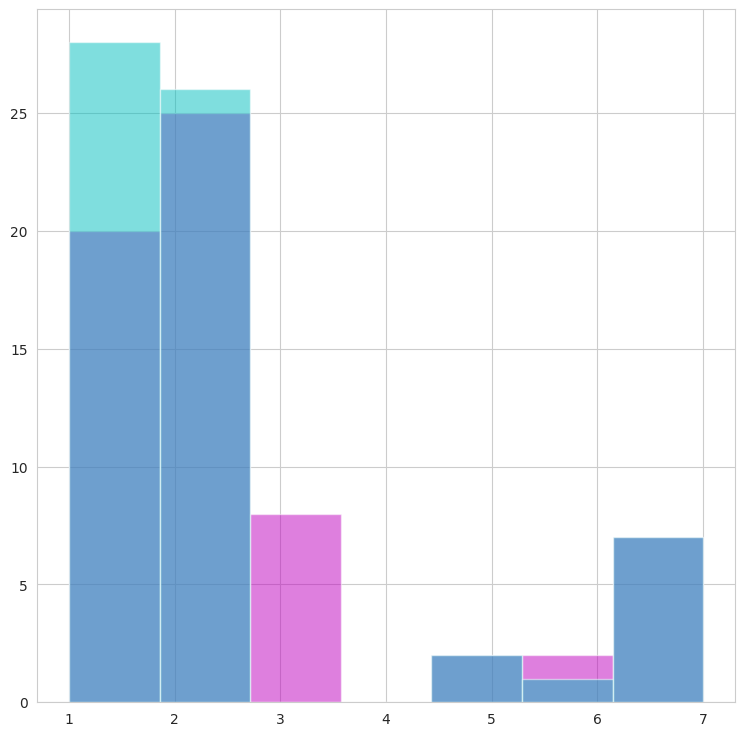

In [63]:
plt.rcParams['figure.figsize'] = (9,9)
_, ax = plt.subplots()
ax.hist(y_test, color ='m', alpha = 0.5, label = 'actual', bins=7)
ax.hist(pred, color = 'c', alpha=0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arrage(0, 32))
ax.legend(loc = 'best')
plt.show()

# 7.3 K-Nearest Neighbors(K-NN)

In [64]:
# Fitting classifier to the TRAINING SET
from sklearn.pipeline import Pipeline
classifier_knn = KNeighborsClassifier()
steps = [
    ('model', KNeighborsClassifier())
]
knn_pipe = Pipeline(steps)

In [73]:
parameters = { 'model__algorithm' : ['brute'],
               'model__leaf_size' : [30,50,70,90,110],
               'model__metric' : ['minkowski'],
               'model__p' : [1],
               'model__n_neighbors' : [3,5,11,19],
               'model__weights' : ['uniform', 'distance'],
               'model__n_jobs' : [-1]
}
classifier_knn = GridSearchCV(knn_pipe, parameters, cv = 10)
classifier_knn = classifier_knn.fit(x_train, y_train.values.ravel())

In [74]:
y_pred_knn_train = classifier_knn.predict(x_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training set Accuracy: ", accuracy_knn_train)

y_pred_knn_test = classifier_knn.predict(x_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Test set Accuracy: ", accuracy_knn_test)

Training set Accuracy:  1.0
Test set Accuracy:  0.65625


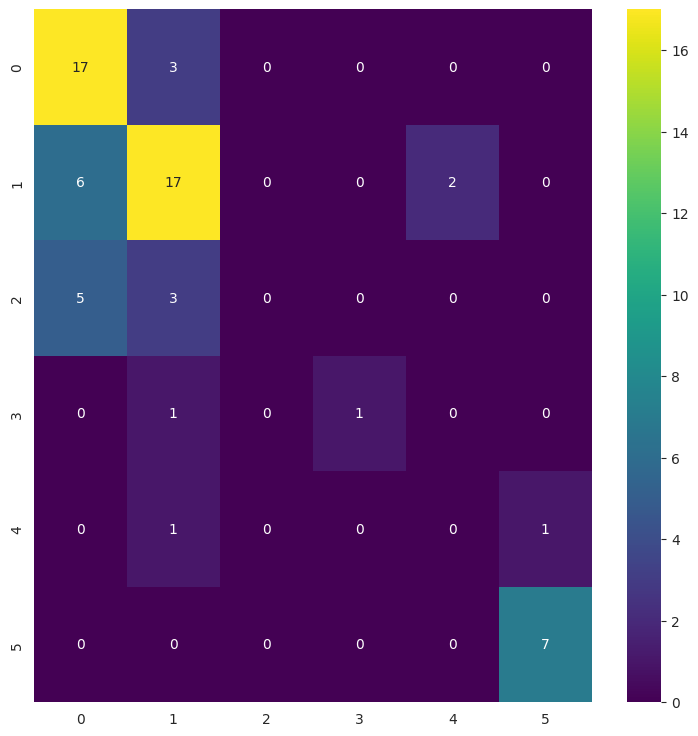

In [76]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn_test), annot= True, cmap='viridis',fmt='.0f' )
plt.show()

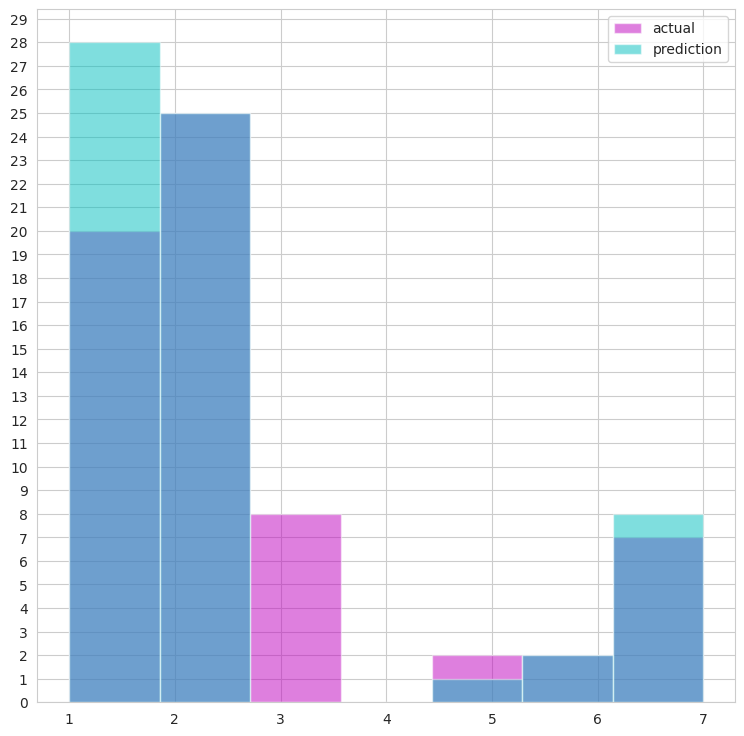

In [77]:
plt.rcParams['figure.figsize'] = (9,9)
_, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha=0.5, label = 'actual', bins=7)
ax.hist(y_pred_knn_test, color ='c', alpha=0.5, label='prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,30))
ax.legend(loc = 'best')
plt.show()

## 8 Inference<a class="anchor" id="8"></a>
### So interestingly,
**`The duplicated values and the outliers were removed from the dataset,
Standard Scaler was used to scaled on the train and test data
Grid Serach was used to find the optimal k value for the KNN algorithm
The accuracy of KNN models was greater then every value where n=3
`**